In [1]:
getwd()

[1] "/content"

In [2]:
dir.create("LoanDefaultAnalysis_R")

In [3]:
wd = "/content/LoanDefaultAnalysis_R"
setwd(wd)

In [4]:
getwd()

[1] "/content/LoanDefaultAnalysis_R"

In [5]:
str(allPackage <- installed.packages(.Library, priority = "high"))
allPackage [, c(1,3:5)]

 chr [1:29, 1:16] "base" "boot" "class" "cluster" "codetools" "compiler" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:29] "base" "boot" "class" "cluster" ...
  ..$ : chr [1:16] "Package" "LibPath" "Version" "Priority" ...


,Package,Version,Priority,Depends
base,base,4.1.2,base,NA
boot,boot,1.3-28,recommended,"R (>= 3.0.0), graphics, stats"
class,class,7.3-20,recommended,"R (>= 3.0.0), stats, utils"
cluster,cluster,2.1.2,recommended,R (>= 3.4.0)
codetools,codetools,0.2-18,recommended,R (>= 2.1)
compiler,compiler,4.1.2,base,NA
datasets,datasets,4.1.2,base,NA
foreign,foreign,0.8-82,recommended,R (>= 4.0.0)
graphics,graphics,4.1.2,base,NA
grDevices,grDevices,4.1.2,base,NA


In [6]:
url <-"https://raw.githubusercontent.com/lemoinef/Loan-Default-Prediction/master/loans_2007.csv"
raw_data <- read.csv(url)

In [7]:
head(raw_data,5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,⋯,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,⋯,171.62,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
2,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,⋯,119.66,Oct-2016,0,1,INDIVIDUAL,0,0,0,0,0
3,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,⋯,649.91,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
4,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,⋯,357.48,Apr-2016,0,1,INDIVIDUAL,0,0,0,0,0
5,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,⋯,67.79,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0


In [8]:
write.csv(raw_data,"raw_loan_default.csv")

In [9]:
str(raw_data)

'data.frame':	42538 obs. of  52 variables:
 $ id                        : chr  "1077501" "1077430" "1077175" "1076863" ...
 $ member_id                 : num  1296599 1314167 1313524 1277178 1311748 ...
 $ loan_amnt                 : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt               : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv           : num  4975 2500 2400 10000 3000 ...
 $ term                      : chr  " 36 months" " 60 months" " 36 months" " 36 months" ...
 $ int_rate                  : chr  " 10.65%" " 15.27%" " 15.96%" " 13.49%" ...
 $ installment               : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                     : chr  "B" "C" "C" "C" ...
 $ sub_grade                 : chr  "B2" "C4" "C5" "C1" ...
 $ emp_title                 : chr  "" "Ryder" "" "AIR RESOURCES BOARD" ...
 $ emp_length                : chr  "10+ years" "< 1 year" "10+ years" "10+ years" ...
 $ home_ownership            : chr  "RENT" "RENT" "RENT" "RENT" ...
 $ annual_inc

In [10]:
library(readxl)
read_excel("/content/LCDataDictionary.xlsx")

LoanStatNew,Description
<chr>,<chr>
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


In [11]:
data <- read_excel("/content/LCDataDictionary.xlsx")
data

LoanStatNew,Description
<chr>,<chr>
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


In [12]:
dim(raw_data)

[1] 42538    52

In [13]:
names(raw_data)

[1] "id"                         "member_id"                 
 [3] "loan_amnt"                  "funded_amnt"               
 [5] "funded_amnt_inv"            "term"                      
 [7] "int_rate"                   "installment"               
 [9] "grade"                      "sub_grade"                 
[11] "emp_title"                  "emp_length"                
[13] "home_ownership"             "annual_inc"                
[15] "verification_status"        "issue_d"                   
[17] "loan_status"                "pymnt_plan"                
[19] "purpose"                    "title"                     
[21] "zip_code"                   "addr_state"                
[23] "dti"                        "delinq_2yrs"               
[25] "earliest_cr_line"           "inq_last_6mths"            
[27] "open_acc"                   "pub_rec"                   
[29] "revol_bal"                  "revol_util"                
[31] "total_acc"                  "initial_list_status"       
[33] "out_prncp"                  "out_prncp_inv"             
[35] "total_pymnt"                "total_pymnt_inv"           
[37] "total_rec_prncp"            "total_rec_int"             
[39] "total_rec_late_fee"         "recoveries"                
[41] "collection_recovery_fee"    "last_pymnt_d"              
[43] "last_pymnt_amnt"            "last_credit_pull_d"        
[45] "collections_12_mths_ex_med" "policy_code"               
[47] "application_type"           "acc_now_delinq"            
[49] "chargeoff_within_12_mths"   "delinq_amnt"               
[51] "pub_rec_bankruptcies"       "tax_liens"

In [14]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [15]:
# 1st_13_set:
features_1st_13_set <- c('id','member_id','loan_amnt','funded_amnt','funded_amnt_inv',
                          'term','int_rate','installment','grade','sub_grade',
                          'emp_title','emp_length','home_ownership')

In [16]:
# subset or fiilter:
subset(data, LoanStatNew %in% features_1st_13_set)
#filter(data, LoanStatNew %in% features_1st_13_set)


LoanStatNew,Description
<chr>,<chr>
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title,The job title supplied by the Borrower when applying for the loan.*
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
grade,LC assigned loan grade
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
id,A unique LC assigned ID for the loan listing.
installment,The monthly payment owed by the borrower if the loan originates.
int_rate,Interest Rate on the loan


In [17]:
raw_data %>%
  select(features_1st_13_set) %>%
  head(5)



Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(features_1st_13_set)` instead of `features_1st_13_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,,10+ years,RENT
2,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT
3,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,,10+ years,RENT
4,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT
5,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT


In [18]:
# drop columns which is not useful:
drop_col_1st_set <- c('id',	'member_id', 'funded_amnt',	'funded_amnt_inv',
                      'grade', 'sub_grade', 'emp_title')

In [19]:
# 2nd_13_set:
features_2nd_13_set <- c('annual_inc','verification_status','issue_d',
                          'loan_status',
                          'pymnt_plan','purpose','title','zip_code',
                          'addr_state','dti','delinq_2yrs',
                          'earliest_cr_line','inq_last_6mths')

In [20]:
subset(data, LoanStatNew %in% features_2nd_13_set)

LoanStatNew,Description
<chr>,<chr>
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
earliest_cr_line,The month the borrower's earliest reported credit line was opened
inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
issue_d,The month which the loan was funded
loan_status,Current status of the loan
purpose,A category provided by the borrower for the loan request.


In [21]:
raw_data %>% 
  select(features_2nd_13_set) %>%
  head(5)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(features_2nd_13_set)` instead of `features_2nd_13_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,24000,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1
2,30000,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-1999,5
3,12252,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,2
4,49200,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-1996,1
5,80000,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0,Jan-1996,0


In [22]:
# drop col:
drop_col_2nd_set <- c("issue_d","zip_code")

In [23]:
# 3rd_13_set:
features_3rd_13_set <- c('open_acc','pub_rec','revol_bal','revol_util',
                        'total_acc','initial_list_status','out_prncp',
                        'out_prncp_inv','total_pymnt','total_pymnt_inv',
                        'total_rec_prncp','total_rec_int',
                        'total_rec_late_fee')

In [24]:
subset (data, LoanStatNew %in% features_3rd_13_set)

LoanStatNew,Description
<chr>,<chr>
initial_list_status,"The initial listing status of the loan. Possible values are – W, F"
open_acc,The number of open credit lines in the borrower's credit file.
out_prncp,Remaining outstanding principal for total amount funded
out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
pub_rec,Number of derogatory public records
revol_bal,Total credit revolving balance
revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
total_acc,The total number of credit lines currently in the borrower's credit file
total_pymnt,Payments received to date for total amount funded


In [25]:
raw_data %>%
select(features_3rd_13_set) %>%
head(5)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(features_3rd_13_set)` instead of `features_3rd_13_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0,13648,83.7%,9,f,0.00,0.00,5863.155,5833.84,5000.00,863.16,0.00
2,3,0,1687,9.4%,4,f,0.00,0.00,1014.530,1014.53,456.46,435.17,0.00
3,2,0,2956,98.5%,10,f,0.00,0.00,3005.667,3005.67,2400.00,605.67,0.00
4,10,0,5598,21%,37,f,0.00,0.00,12231.890,12231.89,10000.00,2214.92,16.97
5,15,0,27783,53.9%,38,f,73.71,73.71,3987.860,3987.86,2926.29,1061.57,0.00


In [26]:
# drop col:
drop_col_3rd_set <- c("out_prncp",	"out_prncp_inv",	"total_pymnt",
                      "total_pymnt_inv",	"total_rec_prncp",
                      "total_rec_int",	"total_rec_late_fee")

In [27]:
# 4th_13_set:
features_4th_13_set <- c('recoveries','collection_recovery_fee',
                          'last_pymnt_d',
                          'last_pymnt_amnt','last_credit_pull_d',
                          'collections_12_mths_ex_med','policy_code',
                          'application_type','acc_now_delinq',
                          'chargeoff_within_12_mths',
                          'delinq_amnt','pub_rec_bankruptcies','tax_liens')

In [28]:
subset(data, LoanStatNew %in% features_4th_13_set)

LoanStatNew,Description
<chr>,<chr>
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
chargeoff_within_12_mths,Number of charge-offs within 12 months
collection_recovery_fee,post charge off collection fee
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
last_credit_pull_d,The most recent month LC pulled credit for this loan
last_pymnt_amnt,Last total payment amount received
last_pymnt_d,Last month payment was received


In [29]:
raw_data %>%
select(features_4th_13_set) %>%
head(5)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(features_4th_13_set)` instead of `features_4th_13_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.


,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0,0.00,Jan-2015,171.62,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
2,122.9,1.11,Apr-2013,119.66,Oct-2016,0,1,INDIVIDUAL,0,0,0,0,0
3,0.0,0.00,Jun-2014,649.91,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
4,0.0,0.00,Jan-2015,357.48,Apr-2016,0,1,INDIVIDUAL,0,0,0,0,0
5,0.0,0.00,Dec-2016,67.79,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0


In [30]:
# drop col:
drop_col_4th_set <- c("recoveries",	"collection_recovery_fee",
                      "last_pymnt_d","last_pymnt_amnt")

In [31]:
# now drop col from all 'sets':
columns_to_drop <- c(drop_col_1st_set, drop_col_2nd_set, 
                      drop_col_3rd_set, drop_col_4th_set)

In [32]:
columns_to_drop

[1] "id"                      "member_id"              
 [3] "funded_amnt"             "funded_amnt_inv"        
 [5] "grade"                   "sub_grade"              
 [7] "emp_title"               "issue_d"                
 [9] "zip_code"                "out_prncp"              
[11] "out_prncp_inv"           "total_pymnt"            
[13] "total_pymnt_inv"         "total_rec_prncp"        
[15] "total_rec_int"           "total_rec_late_fee"     
[17] "recoveries"              "collection_recovery_fee"
[19] "last_pymnt_d"            "last_pymnt_amnt"

In [33]:
# filtere data : after "drop col":
filtered_data <- raw_data %>%
  select(select = -c(drop_col_1st_set,drop_col_2nd_set,
                    drop_col_3rd_set,drop_col_4th_set))
 filtered_data %>% head(5)                  

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_col_1st_set)` instead of `drop_col_1st_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_col_2nd_set)` instead of `drop_col_2nd_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_col_3rd_set)` instead of `drop_col_3rd_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(drop_col_4th_set)` instead of `drop_col_4th_set` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-ve

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,⋯,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5000,36 months,10.65%,162.87,10+ years,RENT,24000,Verified,Fully Paid,n,⋯,f,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
2,2500,60 months,15.27%,59.83,< 1 year,RENT,30000,Source Verified,Charged Off,n,⋯,f,Oct-2016,0,1,INDIVIDUAL,0,0,0,0,0
3,2400,36 months,15.96%,84.33,10+ years,RENT,12252,Not Verified,Fully Paid,n,⋯,f,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0
4,10000,36 months,13.49%,339.31,10+ years,RENT,49200,Source Verified,Fully Paid,n,⋯,f,Apr-2016,0,1,INDIVIDUAL,0,0,0,0,0
5,3000,60 months,12.69%,67.79,1 year,RENT,80000,Source Verified,Current,n,⋯,f,Dec-2016,0,1,INDIVIDUAL,0,0,0,0,0


In [34]:
str(filtered_data)

'data.frame':	42538 obs. of  32 variables:
 $ loan_amnt                 : num  5000 2500 2400 10000 3000 ...
 $ term                      : chr  " 36 months" " 60 months" " 36 months" " 36 months" ...
 $ int_rate                  : chr  " 10.65%" " 15.27%" " 15.96%" " 13.49%" ...
 $ installment               : num  162.9 59.8 84.3 339.3 67.8 ...
 $ emp_length                : chr  "10+ years" "< 1 year" "10+ years" "10+ years" ...
 $ home_ownership            : chr  "RENT" "RENT" "RENT" "RENT" ...
 $ annual_inc                : num  24000 30000 12252 49200 80000 ...
 $ verification_status       : chr  "Verified" "Source Verified" "Not Verified" "Source Verified" ...
 $ loan_status               : chr  "Fully Paid" "Charged Off" "Fully Paid" "Fully Paid" ...
 $ pymnt_plan                : chr  "n" "n" "n" "n" ...
 $ purpose                   : chr  "credit_card" "car" "small_business" "other" ...
 $ title                     : chr  "Computer" "bike" "real estate business" "personel" ...

In [35]:
dim(filtered_data)

[1] 42538    32

In [36]:
write.csv(filtered_data, "filtered_loan_default.csv")

In [37]:
# data filtere with "count" func or with "groupby" func:
# with "count" func:
filtered_data %>%
count(loan_status, sort= TRUE)

loan_status,n
<chr>,<int>
Fully Paid,34085
Charged Off,5662
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Current,19
Late (31-120 days),9
In Grace Period,8
,3
Late (16-30 days),2


In [38]:
# with "gerupby":
filtered_data %>%
  group_by(loan_status) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

loan_status,count
<chr>,<int>
Fully Paid,34085
Charged Off,5662
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Current,19
Late (31-120 days),9
In Grace Period,8
,3
Late (16-30 days),2


In [39]:
# making a plot using library(ggplot):
library(ggplot2)

In [40]:
install.packages("forcats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(forcats)

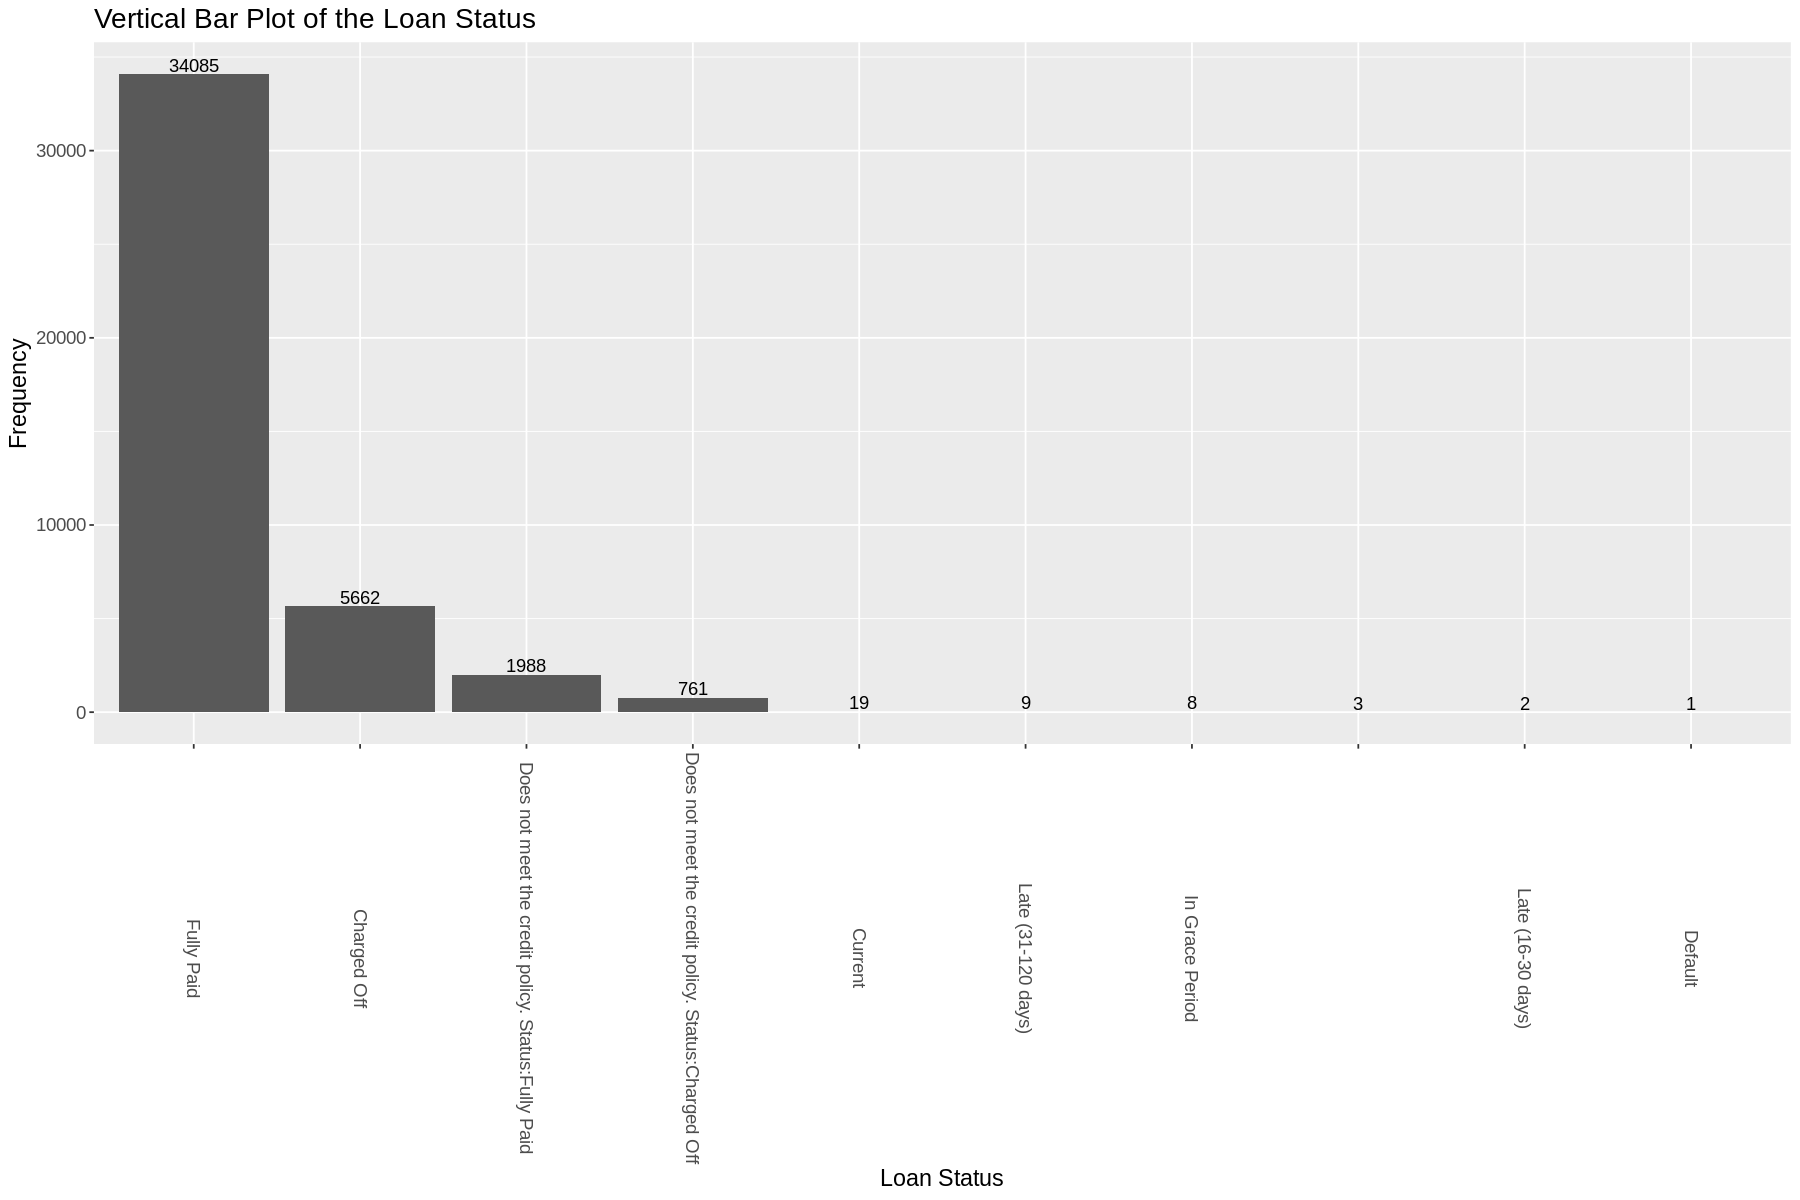

In [42]:
options(repr.plot.width=15, repr.plot.height=10)

ggplot(filtered_data, aes(x = fct_infreq(loan_status))) + 
        geom_bar(position = "dodge") + 
        labs(title = "Vertical Bar Plot of the Loan Status", x="Loan Status",y = "Frequency")+
        geom_text(aes(label = ..count..), stat = 'count', position = position_dodge(0.9), vjust=-0.2) + 
        theme(axis.text.x = element_text(angle = 270, vjust = 0.5),text = element_text(size = 14))

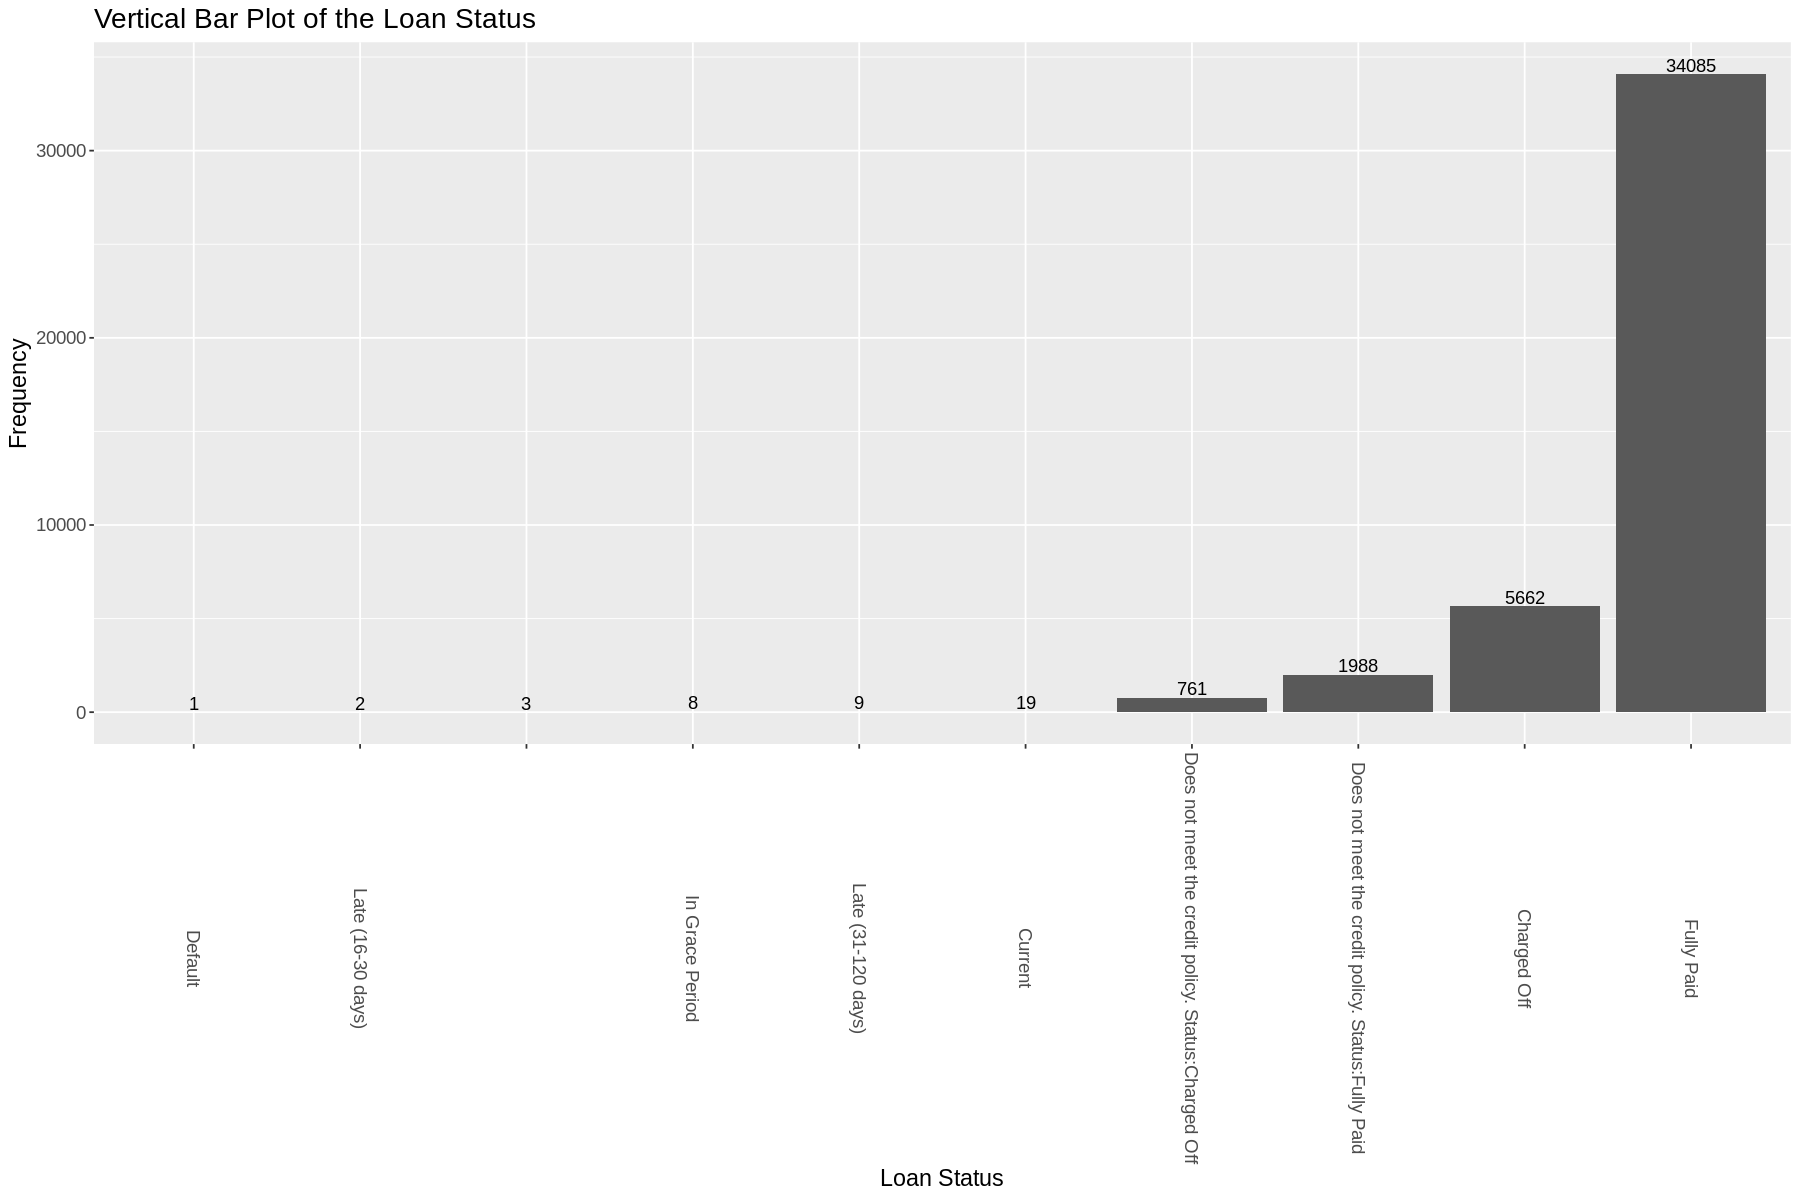

In [43]:
# make a reversse plot:
options(repr.plot.width=15, repr.plot.height=10)

ggplot(filtered_data, aes(x =fct_rev(fct_infreq(loan_status)))) + 
        geom_bar(position = "dodge") + 
        labs(title = "Vertical Bar Plot of the Loan Status", x="Loan Status",y = "Frequency")+
        geom_text(aes(label = ..count..), stat = 'count', position = position_dodge(0.9), vjust=-0.2) + 
        theme(axis.text.x = element_text(angle = 270, vjust = 0.5),text = element_text(size = 14))

In [45]:
df <- filtered_data %>%
filter(loan_status %in% c("Fully Paid", "Charged Off"))

In [46]:
write.csv(df, "loan_data.csv")

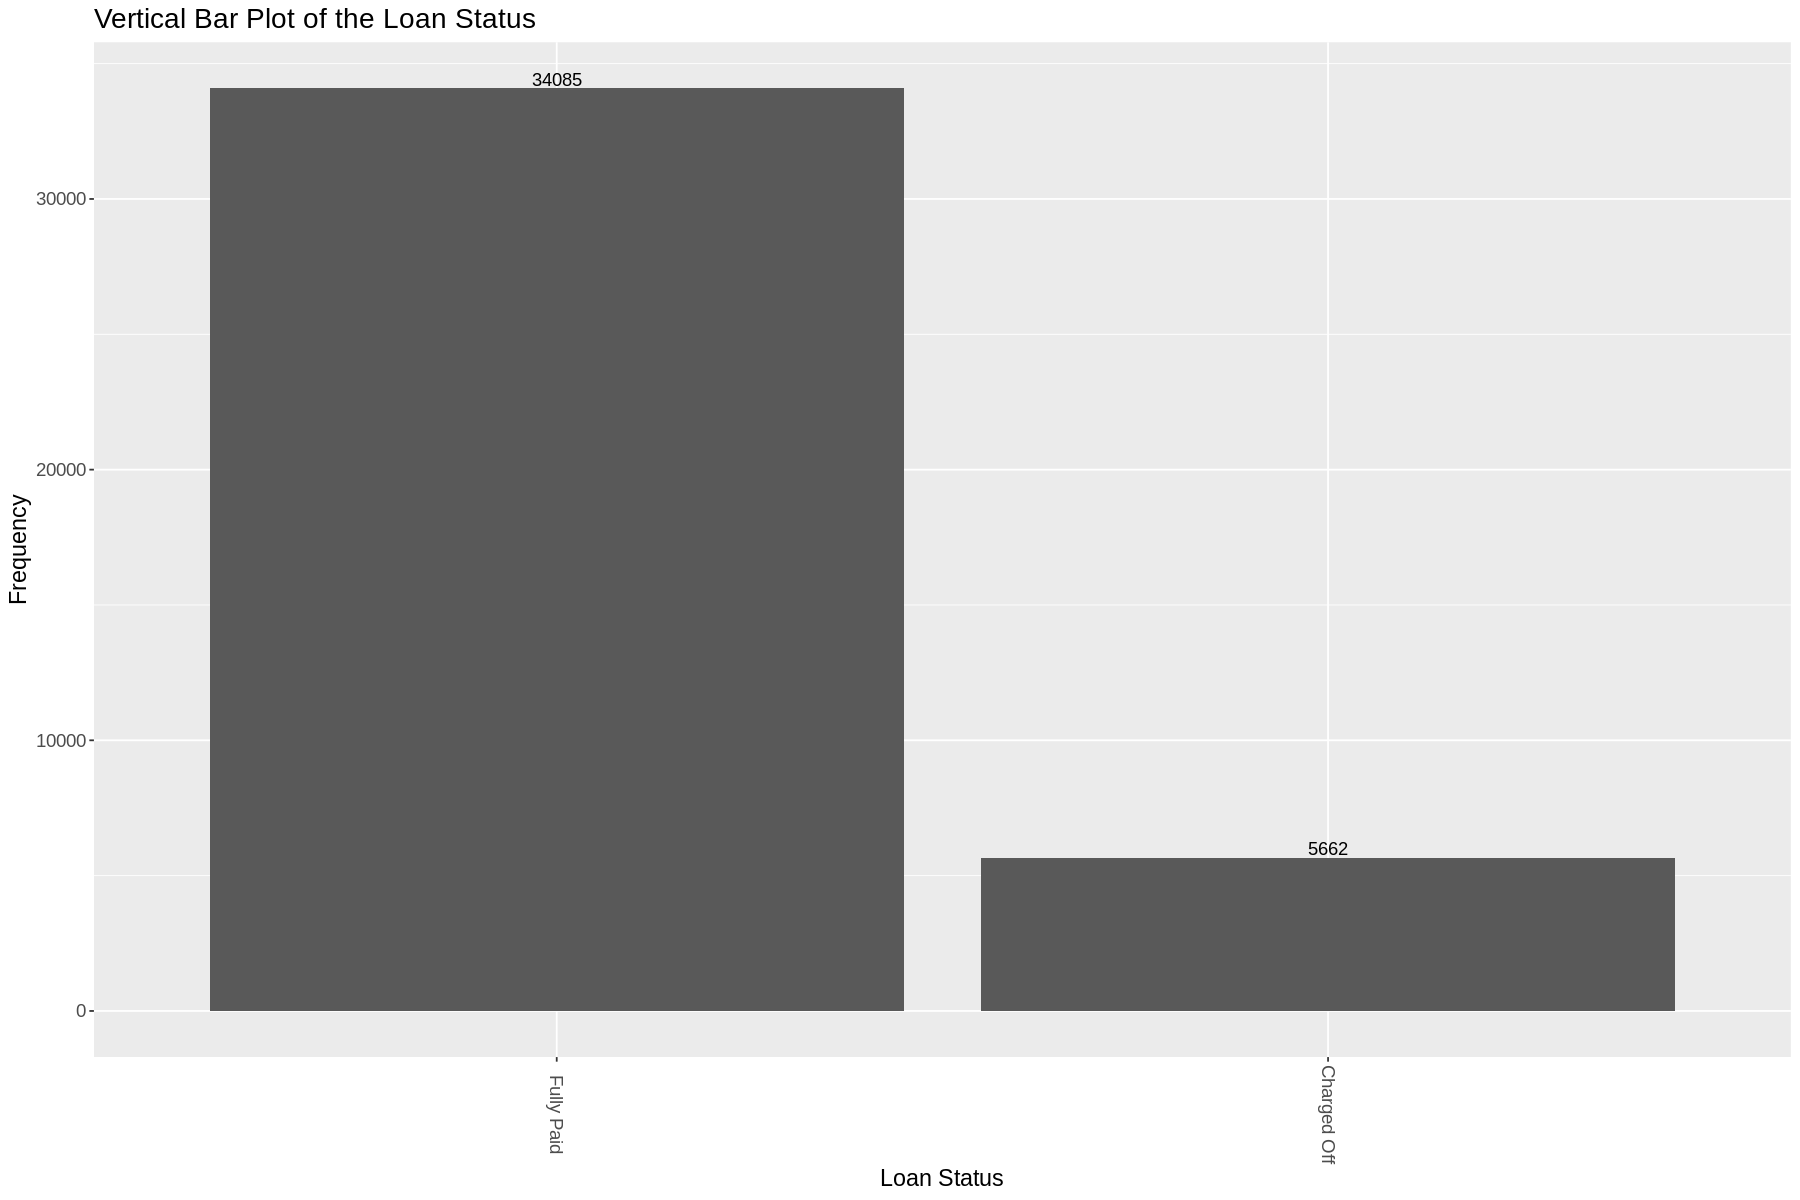

In [47]:
# making plot for "fully paid" 7 "Charged Off":
options(repr.plot.width=15, repr.plot.height=10)

ggplot(df, aes(x =fct_infreq(loan_status))) + 
        geom_bar(position = "dodge") + 
        labs(title = "Vertical Bar Plot of the Loan Status", x="Loan Status",y = "Frequency")+
        geom_text(aes(label = ..count..), stat = 'count', position = position_dodge(0.9), vjust=-0.2) + 
        theme(axis.text.x = element_text(angle = 270, vjust = 0.5),text = element_text(size = 14))

In [48]:
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘htmlwidgets’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [49]:
library(DataExplorer)
library(tidyr)
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract




In [50]:
df %>%
  create_report(
    output_file = "loan_default_profile_report",
    output_dir = ,
    y= "loan_status",
    report_title = "EDA Report - Loan Default Analysis"
  )



processing file: report.rmd



  |..                                                                    |   2%
   inline R code fragments

  |...                                                                   |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                                 |   7%
  ordinary text without R code

  |.......                                                               |  10%
label: introduce
  |........                                                              |  12%
  ordinary text without R code

  |..........                                                            |  14%
label: plot_intro
  |............                                                          |  17%
  ordinary text without R code

  |.............                                                         |  19%
label: data_structure
  |...............                                                       |  21%
  ordinary text without R c

output file: /content/LoanDefaultAnalysis_R/report.knit.md




/usr/bin/pandoc +RTS -K512m -RTS /content/LoanDefaultAnalysis_R/report.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/LoanDefaultAnalysis_R/loan_default_profile_report.html --self-contained --variable bs3=TRUE --standalone --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=yeti --include-in-header /tmp/RtmpicTLSM/rmarkdown-str41251255a3.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: loan_default_profile_report.html



In [51]:
# Data Pre-Processing using R:

In [52]:
# Data Quality/Sanity/ Integrity Check:

In [53]:
# "skimr" which gives clearity of how many character-(objects- in Py) or numeric values: 
#for Character turned in to "Factor"

install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [54]:
library(skimr)

In [55]:
df %>% skim()

── Data Summary ────────────────────────
                           Values    
Name                       Piped data
Number of rows             39747     
Number of columns          32        
_______________________              
Column type frequency:               
  character                15        
  numeric                  17        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate   min   max empty n_unique
 1 term                        0             1    10    10     0        2
 2 int_rate                    0             1     7     7     0      371
 3 emp_length                  0             1     3     9     0       12
 4 home_ownership              0             1     3     8     0        5
 5 verification_status         0             1     8    15     0        3
 6 loan_status                 0             1    10 

In [56]:
# here we are droping some coloumns which doesn't have any unique values- 
# so, it's mean & std. deviation are 0:
single_value_columns <- df %>%
    select_if(function(col) length(unique(col))==1)

In [57]:
names(single_value_columns)

[1] "pymnt_plan"          "initial_list_status" "policy_code"        
[4] "application_type"    "acc_now_delinq"      "delinq_amnt"

In [58]:
# drop all columns(which has skimr data) have only 1 & 0 mean and 0 std. deviation:
c("pymnt_plan", "initial_list_status",
  "application_type","collections_12_mths_ex_med",
  "policy_code","acc_now_delinq",
  "chargeoff_within_12_mths","delinq_amnt",
  "tax_liens")

  subset(df, select=c("pymnt_plan", "initial_list_status",
                      "application_type","collections_12_mths_ex_med",
                      "policy_code","acc_now_delinq",
                      "chargeoff_within_12_mths","delinq_amnt",
                      "tax_liens") )

[1] "pymnt_plan"                 "initial_list_status"       
[3] "application_type"           "collections_12_mths_ex_med"
[5] "policy_code"                "acc_now_delinq"            
[7] "chargeoff_within_12_mths"   "delinq_amnt"               
[9] "tax_liens"

,pymnt_plan,initial_list_status,application_type,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,n,f,INDIVIDUAL,0,1,0,0,0,0
2,n,f,INDIVIDUAL,0,1,0,0,0,0
3,n,f,INDIVIDUAL,0,1,0,0,0,0
4,n,f,INDIVIDUAL,0,1,0,0,0,0
5,n,f,INDIVIDUAL,0,1,0,0,0,0
6,n,f,INDIVIDUAL,0,1,0,0,0,0
7,n,f,INDIVIDUAL,0,1,0,0,0,0
8,n,f,INDIVIDUAL,0,1,0,0,0,0
9,n,f,INDIVIDUAL,0,1,0,0,0,0


In [59]:
# after dropping coloumns which has 0 or 1 std. dev. how much columns are reaining in df: 
df <- df %>%
  select(select = -c("pymnt_plan", "initial_list_status",
                    "application_type","collections_12_mths_ex_med",
                    "policy_code","acc_now_delinq",
                    "chargeoff_within_12_mths","delinq_amnt",
                    "tax_liens"))

In [60]:
dim(df)

[1] 39747    23

In [61]:
# Handling|Dealing|Treating Missing Values:

In [62]:
# now handling missing- null values: 

In [63]:
colSums(is.na(df))

loan_amnt                 term             int_rate 
                   0                    0                    0 
         installment           emp_length       home_ownership 
                   0                    0                    0 
          annual_inc  verification_status          loan_status 
                   0                    0                    0 
             purpose                title           addr_state 
                   0                    0                    0 
                 dti          delinq_2yrs     earliest_cr_line 
                   0                    0                    0 
      inq_last_6mths             open_acc              pub_rec 
                   0                    0                    0 
           revol_bal           revol_util            total_acc 
                   0                    0                    0 
  last_credit_pull_d pub_rec_bankruptcies 
                   0                  697

In [64]:
null_count <- sapply(df, function(x) sum(is.na(x)))
data.frame(null_count)

,null_count
,<int>
loan_amnt,0
term,0
int_rate,0
installment,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
loan_status,0


In [65]:
# from previous cell we find out there is "pub_rec_bankruptcies" which has 697 missing values. 
# we will not remove cvol but will remove rows.
# we consider rows as incomplete.

In [66]:
# drop row "pub_rec_bankruptcies"

In [67]:
df <- df %>%
  select(select = -c("pub_rec_bankruptcies"))
  

In [68]:
# Handling|Dealing|Treating Categorical|String Values:

In [69]:
# will use 'sapply' for how many Character & numerical values we have
# for character- we can  convert it in to factor:
table(sapply(df, class))


character   numeric 
       12        10 

In [70]:
# "is.character" gives the columns name which has 12 character:
col_names <- df %>%
  select_if(is.character) %>%
  names()

col_names 

[1] "term"                "int_rate"            "emp_length"         
 [4] "home_ownership"      "verification_status" "loan_status"        
 [7] "purpose"             "title"               "addr_state"         
[10] "earliest_cr_line"    "revol_util"          "last_credit_pull_d"

In [71]:
# we will convert 'charactor' in to 'factor':
# using 'mutate_if'

df <- df %>% mutate_if (is.character, as.factor)

# or we can use it in reverse order as well:
#df <- df %>% mutate_if(is.factor, is.character)

In [72]:
table(sapply(df, class))


 factor numeric 
     12      10 

In [73]:
# now, in numerical it is no.s with '%'
# so, we will split the nos with "%"
 

In [74]:
df %>%
  count(int_rate, sort = TRUE)

int_rate,n
<fct>,<int>
10.99%,958
13.49%,831
11.49%,826
7.51%,787
7.88%,725
7.49%,656
11.71%,609
9.99%,603
7.90%,582


In [75]:
# from the last sort data it numerical has % sign,which need to split:
# for that use "gsub":

df <- df %>% mutate(int_rate = as.numeric(gsub("%", "", int_rate))) 

In [76]:
# like wise for "revol_util" - speprate nos: 
df %>%
  count(revol_util, sort =TRUE)

revol_util,n
<fct>,<int>
0%,980
0.2%,63
63%,62
40.7%,59
0.1%,58
66.7%,58
31.2%,57
46.4%,57
61%,57


In [77]:
df <- df %>% mutate(revol_util = as.numeric(gsub("%", "", revol_util)))

In [78]:
# checking terms:

In [79]:
df %>% 
  count(term, sort = TRUE)

term,n
<fct>,<int>
36 months,29096
60 months,10651


In [80]:
# will remove "months" character from 36 months 
# as we want only numerical values:
loan_term.map <- c(" 36 months" = 36,
                    " 60 months" = 60)
df$term <- loan_term.map [as.character(df$term)]
df$term

[1] 36 60 36 36 36 60 36 60 60 60 36 36 36 36 36 36 36 36 36 60 36 36 36 36
   [25] 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
   [49] 36 36 36 36 60 60 36 36 36 60 60 60 36 60 36 60 36 60 36 60 36 36 36 36
   [73] 36 36 60 36 60 60 36 36 36 36 36 60 36 36 36 36 60 36 36 60 60 36 36 60
   [97] 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 36 36 36 60 36
  [121] 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 60
  [145] 60 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36
  [169] 36 36 36 60 36 60 36 36 36 36 60 36 36 60 36 36 36 36 60 60 36 36 36 36
  [193] 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 60 60 36 36 36
  [217] 36 60 36 60 60 36 36 36 36 36 36 36 36 36 36 60 36 60 36 36 36 36 36 36
  [241] 36 36 60 36 36 36 36 36 36 36 60 60 36 36 60 36 36 36 36 36 36 60 36 60
  [265] 36 36 60 36 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 36 36 36
  [289] 36 36 36 36 36 60 60 36 36 60 36 60 36 36 36 36 36 36 60 60 36 36 60 60
  [313] 36 36 60 36 60 36 36 60 60 36 36 36 36 36 60 36 60 60 60 60 36 36 36 36
  [337] 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36
  [361] 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 60 36
  [385] 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 60 36 36
  [409] 60 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36 60 60 36 36 36 36
  [433] 36 36 36 36 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36 36 36 60 36 36
  [457] 36 36 60 36 60 36 36 60 36 60 60 36 36 36 60 36 36 36 36 36 60 60 36 60
  [481] 60 36 60 60 36 36 60 60 36 36 60 36 36 36 36 36 60 60 36 36 36 60 36 60
  [505] 36 36 36 60 36 36 60 60 36 60 36 60 36 36 36 36 36 36 60 60 36 36 36 60
  [529] 36 36 60 36 60 36 36 60 60 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36
  [553] 36 36 36 36 60 36 60 36 60 36 36 36 60 36 36 36 36 60 36 36 36 36 36 36
  [577] 36 36 36 36 36 36 36 60 36 36 36 60 36 36 36 60 36 36 36 60 60 36 36 36
  [601] 36 60 36 60 36 36 60 36 36 60 36 36 60 60 36 36 60 36 60 60 60 36 36 36
  [625] 60 60 36 36 36 36 60 36 36 36 60 36 36 36 36 36 60 36 60 60 60 36 60 36
  [649] 36 36 36 36 36 36 36 60 36 36 36 60 60 60 36 36 36 36 36 60 36 36 36 60
  [673] 36 36 36 36 60 36 60 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36
  [697] 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  [721] 60 36 60 36 36 36 36 60 36 36 36 36 36 36 60 36 36 36 60 60 60 36 60 36
  [745] 36 60 36 60 36 36 36 60 60 60 36 36 36 36 60 36 36 36 36 36 36 36 36 36
  [769] 60 36 36 60 36 36 36 60 36 36 36 36 60 36 36 36 60 60 36 36 36 60 36 60
  [793] 36 36 60 60 60 36 36 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60
  [817] 36 36 36 60 60 36 60 60 60 60 36 60 36 36 60 36 36 60 36 36 36 36 60 36
  [841] 36 36 36 60 36 36 60 60 60 36 36 36 36 36 36 36 36 36 36 36 36 36 60 36
  [865] 36 36 60 36 60 36 60 36 36 60 36 36 36 60 36 60 36 36 36 36 60 36 36 36
  [889] 36 36 60 36 60 36 60 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36
  [913] 60 36 36 36 60 60 60 36 36 60 36 36 36 60 36 60 36 60 36 36 60 36 36 36
  [937] 36 36 36 60 36 60 36 60 36 36 60 36 36 60 36 36 36 60 60 36 36 36 36 36
  [961] 36 36 36 36 60 36 36 36 36 60 60 60 60 36 60 36 36 36 36 36 36 60 60 36
  [985] 36 36 36 36 36 60 36 36 60 36 36 36 36 36 60 60 36 36 36 36 36 36 60 36
 [1009] 60 60 60 36 60 60 36 60 60 36 36 36 60 36 60 36 36 60 60 60 36 36 36 60
 [1033] 60 36 36 60 60 60 60 36 36 36 60 60 36 36 36 36 60 60 36 60 36 36 36 36
 [1057] 36 36 36 36 60 60 60 36 60 36 36 36 60 36 60 36 60 36 36 36 36 36 60 36
 [1081] 36 60 36 36 36 36 60 60 60 36 36 60 36 60 36 60 60 36 60 36 36 36 36 36
 [1105] 36 36 36 36 60 60 36 36 36 36 36 60 36 60 60 36 36 36 36 36 36 36 60 60
 [1129] 36 36 36 36 36 36 36 36 36 36 60 36 36 36 36 36 36 60 60 60 36 36 60 36
 [1153] 36 60 36 60 36 36 36 60 36 36 36 36 60 60 60 36 60 60 36 60 36 36 36 36
 [1177] 36 60 60 36 60 60 60 36 36 36 36 36 36 36 36 36 36 60 60 60 36 60 36 60
 [12

In [81]:
# checking df in term -"month" character till included or not:
df


loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5000,36,10.65,162.87,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,⋯,27.65,0,Jan-1985,1,3,0,13648,83.70,9,Dec-2016
2500,60,15.27,59.83,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,⋯,1.00,0,Apr-1999,5,3,0,1687,9.40,4,Oct-2016
2400,36,15.96,84.33,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,⋯,8.72,0,Nov-2001,2,2,0,2956,98.50,10,Dec-2016
10000,36,13.49,339.31,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,⋯,20.00,0,Feb-1996,1,10,0,5598,21.00,37,Apr-2016
5000,36,7.90,156.46,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,⋯,11.20,0,Nov-2004,3,9,0,7963,28.30,12,Jan-2016
7000,60,15.96,170.08,8 years,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,⋯,23.51,0,Jul-2005,1,7,0,17726,85.60,11,Sep-2016
3000,36,18.64,109.43,9 years,RENT,48000.00,Source Verified,Fully Paid,car,⋯,5.35,0,Jan-2007,2,4,0,8221,87.50,4,Dec-2014
5600,60,21.28,152.39,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,⋯,5.55,0,Apr-2004,2,11,0,5210,32.60,13,Oct-2016
5375,60,12.69,121.45,< 1 year,RENT,15000.00,Verified,Charged Off,other,⋯,18.08,0,Sep-2004,0,2,0,9279,36.50,3,Dec-2016


In [82]:
# after that moving to "emp_length":


In [83]:
df %>% 
  count(emp_length, sort = TRUE)

emp_length,n
<fct>,<int>
10+ years,8888
< 1 year,4587
2 years,4392
3 years,4094
4 years,3438
5 years,3286
1 year,3243
6 years,2228
7 years,1774


In [84]:
# spliting years:
employement_duration.map <- c("10+ years" = 10,
                              "9 years" = 9,
                              "8 years" = 8,
                              "7 years" = 7,
                              "6 years" = 6,
                              "5 years" = 5,
                              "4 years" = 4,
                              "3 years" = 3,
                              "2 years" = 2,
                              "1 years" = 1,
                              "<1 years" = 0,
                              "n/a" = 0)

df$emp_length <- employement_duration.map [as.character(df$emp_length)]

In [85]:
# now comming to "home_ownership" col:

In [86]:
df %>%
  count(home_ownership,sort  =TRUE)

home_ownership,n
<fct>,<int>
RENT,18897
MORTGAGE,17686
OWN,3063
OTHER,98
NONE,3


In [87]:
# moving to "'verification_status'" col:

df %>%
count(verification_status, sort = TRUE)  

verification_status,n
<fct>,<int>
Not Verified,16923
Verified,12820
Source Verified,10004


In [88]:
# One-hot encoding:- which used to convert categorical var. into a format 
# that can be used by machine learning algorithms.


In [89]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [90]:
library("caret")

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [91]:
df %>% 
count(purpose,sort = TRUE)

purpose,n
<fct>,<int>
debt_consolidation,18651
credit_card,5132
other,3998
home_improvement,2984
major_purchase,2187
small_business,1827
car,1551
wedding,948
medical,695


In [92]:
df %>%
count(title,sort = TRUE)

title,n
<fct>,<int>
Debt Consolidation,2187
Debt Consolidation Loan,1728
Personal Loan,661
Consolidation,515
debt consolidation,507
Credit Card Consolidation,357
Home Improvement,357
Debt consolidation,334
Small Business Loan,328


In [93]:
df %>%
count(addr_state, sort = TRUE)

addr_state,n
<fct>,<int>
CA,7101
NY,3813
FL,2869
TX,2732
NJ,1850
IL,1524
PA,1518
VA,1407
GA,1398


In [94]:
sample_cat_df <- subset(df, select = c("home_ownership","verification_status","purpose"))

# define one-hot encoding  function:
# for that will make dummy data:
dummy <- dummyVars(" ~ .", data=sample_cat_df)

# perfom one-hot encoding on data frame:

one_hot_encoded_df <- data.frame(predict(dummy, newdata = sample_cat_df))
one_hot_encoded_df

,home_ownership.MORTGAGE,home_ownership.NONE,home_ownership.OTHER,home_ownership.OWN,home_ownership.RENT,verification_status.Not.Verified,verification_status.Source.Verified,verification_status.Verified,purpose.car,purpose.credit_card,⋯,purpose.home_improvement,purpose.house,purpose.major_purchase,purpose.medical,purpose.moving,purpose.other,purpose.renewable_energy,purpose.small_business,purpose.vacation,purpose.wedding
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0,1,0,0,⋯,0,0,0,0,0,1,0,0,0,0


In [95]:
str(one_hot_encoded_df)

'data.frame':	39747 obs. of  22 variables:
 $ home_ownership.MORTGAGE            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ home_ownership.NONE                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ home_ownership.OTHER               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ home_ownership.OWN                 : num  0 0 0 0 0 0 0 1 0 1 ...
 $ home_ownership.RENT                : num  1 1 1 1 1 1 1 0 1 0 ...
 $ verification_status.Not.Verified   : num  0 0 1 0 0 1 0 0 0 1 ...
 $ verification_status.Source.Verified: num  0 1 0 1 1 0 1 1 0 0 ...
 $ verification_status.Verified       : num  1 0 0 0 0 0 0 0 1 0 ...
 $ purpose.car                        : num  0 1 0 0 0 0 1 0 0 0 ...
 $ purpose.credit_card                : num  1 0 0 0 0 0 0 0 0 0 ...
 $ purpose.debt_consolidation         : num  0 0 0 0 0 1 0 0 0 1 ...
 $ purpose.educational                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ purpose.home_improvement           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ purpose.house                      : num  0 0 0 0 0 0 0 0

# Handling Date Time:

# for date time will use "earliest_cr_line" or "last_credit_pull_d":

 1. earliest_cr_line:  "The month the borrower's earliest reportted credit line was opened"
2. last_credit_pull_d:"The momst recent month LC pulled credit for this loan"



In [96]:
df %>%
count(earliest_cr_line,sort = TRUE)

earliest_cr_line,n
<fct>,<int>
Nov-1998,369
Oct-1999,364
Dec-1998,349
Oct-2000,346
Dec-1997,329
Nov-2000,320
Nov-1999,319
Oct-1998,307
Sep-2000,306


In [97]:
df %>%
count(last_credit_pull_d, sort = TRUE)

last_credit_pull_d,n
<fct>,<int>
Dec-2016,10638
Oct-2016,4567
Nov-2016,865
Mar-2016,720
Feb-2013,641
Apr-2016,574
Aug-2016,557
Feb-2016,513
Jul-2016,503


In [98]:
# will subset the both "earliest_cr_line" & "last_credit_pull_d"
sample_date_df <- subset(df, select = c("earliest_cr_line","last_credit_pull_d"))

In [99]:
sample_date_df

,earliest_cr_line,last_credit_pull_d
,<fct>,<fct>
1,Jan-1985,Dec-2016
2,Apr-1999,Oct-2016
3,Nov-2001,Dec-2016
4,Feb-1996,Apr-2016
5,Nov-2004,Jan-2016
6,Jul-2005,Sep-2016
7,Jan-2007,Dec-2014
8,Apr-2004,Oct-2016
9,Sep-2004,Dec-2016


Handling | Dealing| Treating Outlers:

In [100]:
df %>%
select_if(is.numeric)   

loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5000,36,10.65,162.87,10,24000.00,27.65,0,1,3,0,13648,83.70,9
2500,60,15.27,59.83,NA,30000.00,1.00,0,5,3,0,1687,9.40,4
2400,36,15.96,84.33,10,12252.00,8.72,0,2,2,0,2956,98.50,10
10000,36,13.49,339.31,10,49200.00,20.00,0,1,10,0,5598,21.00,37
5000,36,7.90,156.46,3,36000.00,11.20,0,3,9,0,7963,28.30,12
7000,60,15.96,170.08,8,47004.00,23.51,0,1,7,0,17726,85.60,11
3000,36,18.64,109.43,9,48000.00,5.35,0,2,4,0,8221,87.50,4
5600,60,21.28,152.39,4,40000.00,5.55,0,2,11,0,5210,32.60,13
5375,60,12.69,121.45,NA,15000.00,18.08,0,0,2,0,9279,36.50,3


In [101]:
col_names <- df %>%
  select_if(is.numeric) %>%
  names()
col_names

[1] "loan_amnt"      "term"           "int_rate"       "installment"   
 [5] "emp_length"     "annual_inc"     "dti"            "delinq_2yrs"   
 [9] "inq_last_6mths" "open_acc"       "pub_rec"        "revol_bal"     
[13] "revol_util"     "total_acc"

BOX PLOT | InterQuartile Range Method | Percentile Method:

I = [ q 0.25 − 1.5 ⋅ I Q R ; q 0.75 + 1.5 ⋅ I Q R ]

In [102]:
# will find outliers:
# using "box Plot":
out <- boxplot.stats(df$loan_amnt)$out
out

[1] 31825 35000 35000 35000 29500 35000 35000 30000 35000 35000 35000 30000
  [13] 33425 35000 35000 30000 30000 35000 30000 35000 35000 35000 35000 35000
  [25] 35000 30000 35000 32000 30000 30000 35000 30000 30000 35000 29500 30000
  [37] 35000 35000 35000 30000 30000 34475 35000 34000 35000 35000 35000 35000
  [49] 35000 30000 30000 35000 30000 35000 35000 30000 35000 35000 35000 30000
  [61] 31000 35000 31300 35000 35000 35000 35000 35000 29700 35000 35000 30000
  [73] 30000 30000 35000 30000 35000 35000 35000 33600 35000 35000 30000 35000
  [85] 35000 35000 35000 30000 35000 32000 30000 30000 30000 35000 35000 33000
  [97] 35000 30000 35000 35000 35000 30000 35000 30000 30000 31000 30000 30000
 [109] 35000 35000 35000 35000 35000 35000 35000 35000 30750 33600 30000 30000
 [121] 35000 35000 35000 33950 35000 35000 30000 35000 30000 30000 30000 35000
 [133] 30000 35000 35000 29700 30000 35000 30000 35000 35000 35000 35000 35000
 [145] 30500 30000 35000 35000 30000 30000 35000 35000 35000 35000 35000 30000
 [157] 30000 32275 35000 30000 30000 35000 35000 35000 30000 35000 30000 35000
 [169] 30000 35000 35000 30000 35000 35000 30000 30000 35000 35000 35000 35000
 [181] 35000 35000 35000 35000 30750 30000 35000 29850 30000 35000 32000 30000
 [193] 35000 35000 29275 35000 35000 35000 35000 35000 35000 32875 35000 35000
 [205] 35000 35000 30000 35000 35000 30000 35000 35000 35000 30000 35000 35000
 [217] 31825 35000 30000 30000 35000 35000 30000 34000 35000 35000 35000 35000
 [229] 30000 35000 35000 35000 30000 35000 30000 30000 35000 34000 30000 30000
 [241] 30000 35000 35000 30000 30000 30000 33600 30000 35000 30000 35000 31000
 [253] 35000 35000 30000 30000 35000 35000 35000 35000 30000 35000 30000 30000
 [265] 30000 30000 30000 35000 34000 35000 35000 31300 32250 35000 35000 30000
 [277] 35000 30000 35000 35000 32000 34000 30000 35000 35000 35000 35000 35000
 [289] 35000 30000 35000 35000 35000 30000 35000 30000 35000 35000 35000 32000
 [301] 30000 30000 35000 30000 31825 35000 30000 35000 30000 35000 29550 35000
 [313] 35000 30000 35000 34475 35000 35000 35000 31500 30000 30000 35000 35000
 [325] 35000 35000 32000 35000 35000 30000 35000 30000 30000 35000 30000 30000
 [337] 35000 35000 30000 30000 35000 35000 35000 30000 35000 32875 30000 35000
 [349] 30000 30000 30000 35000 30000 31000 31800 35000 34000 30000 30000 30000
 [361] 35000 31825 35000 34675 35000 35000 30000 35000 35000 30000 35000 30000
 [373] 30750 35000 35000 35000 35000 35000 30000 30000 30000 35000 30000 30000
 [385] 30000 35000 35000 30000 35000 35000 35000 35000 30000 30000 35000 35000
 [397] 30000 31400 30000 35000 30000 30000 34475 32000 35000 35000 30000 34000
 [409] 31700 35000 35000 31200 35000 35000 29700 30000 30000 30000 35000 35000
 [421] 35000 35000 30000 30000 35000 35000 30000 35000 35000 35000 35000 30000
 [433] 33000 35000 35000 35000 32000 35000 35000 35000 34525 31025 35000 35000
 [445] 35000 35000 35000 35000 29700 35000 30000 35000 30000 30000 30000 30000
 [457] 30000 35000 30750 35000 31150 32000 30100 35000 35000 35000 30000 34000
 [469] 35000 32350 35000 35000 30000 35000 29300 35000 30750 35000 30000 35000
 [481] 30000 35000 30000 30000 32000 35000 30000 35000 35000 35000 35000 30000
 [493] 35000 35000 32000 30000 32400 30000 35000 35000 35000 30000 30000 30000
 [505] 29700 30000 35000 30000 35000 30000 35000 35000 30000 35000 35000 35000
 [517] 29800 30000 35000 35000 35000 30000 30000 35000 35000 30000 35000 35000
 [529] 35000 32000 30000 35000 30000 35000 30000 35000 35000 30000 30000 30000
 [541] 35000 30000 35000 35000 30000 33000 32000 35000 30000 30000 35000 35000
 [553] 35000 35000 31325 30000 30000 30000 32000 35000 35000 35000 35000 35000
 [565] 35000 32000 30000 32400 35000 30000 35000 31000 35000 35000 35000 30000
 [577] 35000 30000 32400 35000 35000 35000 30000 35000 29600 30000 35000 32000
 [589] 35000 35000 35000 35000 35000 30000 35000 35000 35000 30000 35000 30000
 [601] 35000 33950 30000 30000 30000 35000 32000 3500

In [103]:
out_find <- which(df$loan_amnt %in% c(out))
out_find

[1]    31    78   123   180   204   262   270   294   300   330   379   395
  [13]   422   423   488   499   597   600   645   672   693   739   744   745
  [25]   753   769   824   832   844   860   874   906   940   948   971   973
  [37]   982   990  1000  1023  1049  1069  1079  1093  1148  1160  1165  1179
  [49]  1181  1203  1210  1236  1259  1313  1317  1330  1331  1355  1367  1446
  [61]  1456  1474  1489  1512  1556  1565  1578  1581  1590  1593  1601  1613
  [73]  1623  1636  1653  1663  1668  1674  1691  1712  1730  1742  1776  1788
  [85]  1791  1819  1822  1824  1835  1861  1919  1954  1962  1967  1976  2012
  [97]  2075  2086  2091  2105  2107  2109  2117  2139  2178  2207  2216  2222
 [109]  2263  2281  2293  2322  2349  2373  2436  2480  2526  2529  2549  2556
 [121]  2572  2576  2581  2599  2623  2630  2696  2707  2715  2726  2739  2752
 [133]  2753  2759  2774  2792  2796  2799  2800  2813  2831  2855  2896  2899
 [145]  2926  2928  2936  2938  2948  2963  2966  2968  2978  2982  2986  2999
 [157]  3017  3022  3023  3033  3070  3071  3104  3117  3122  3139  3140  3149
 [169]  3153  3161  3166  3168  3178  3184  3197  3201  3209  3223  3232  3244
 [181]  3253  3274  3283  3284  3285  3292  3299  3300  3321  3340  3350  3410
 [193]  3413  3416  3431  3432  3458  3459  3461  3485  3489  3509  3534  3558
 [205]  3573  3578  3594  3597  3633  3639  3660  3680  3687  3702  3733  3748
 [217]  3751  3760  3766  3767  3780  3783  3808  3813  3814  3819  3853  3874
 [229]  3875  3878  3889  3892  3924  3942  3951  3964  3972  3980  4010  4011
 [241]  4014  4034  4044  4071  4076  4115  4128  4142  4144  4168  4178  4197
 [253]  4207  4219  4230  4232  4243  4245  4259  4268  4280  4306  4308  4332
 [265]  4364  4367  4371  4381  4400  4419  4424  4428  4429  4469  4479  4482
 [277]  4497  4527  4534  4544  4595  4596  4599  4600  4607  4614  4655  4680
 [289]  4686  4688  4690  4692  4705  4707  4712  4743  4761  4784  4791  4797
 [301]  4802  4811  4816  4832  4835  4856  4857  4862  4868  4893  4898  4899
 [313]  4905  4908  4921  4929  4936  4942  4956  4970  4991  5016  5042  5044
 [325]  5046  5069  5110  5115  5116  5126  5134  5135  5145  5146  5148  5154
 [337]  5160  5185  5188  5211  5219  5239  5249  5253  5264  5281  5285  5288
 [349]  5291  5301  5343  5370  5374  5422  5431  5439  5441  5460  5461  5467
 [361]  5471  5480  5496  5500  5507  5513  5561  5573  5587  5599  5621  5625
 [373]  5635  5641  5642  5645  5648  5652  5661  5662  5672  5679  5697  5701
 [385]  5723  5724  5736  5764  5767  5768  5781  5865  5868  5872  5887  5900
 [397]  5915  5931  5933  5948  5973  5977  6033  6037  6045  6053  6073  6086
 [409]  6088  6096  6097  6099  6106  6111  6128  6137  6138  6158  6163  6174
 [421]  6175  6225  6237  6241  6252  6257  6258  6262  6263  6265  6275  6287
 [433]  6290  6293  6299  6320  6325  6364  6369  6379  6386  6392  6397  6411
 [445]  6414  6416  6417  6432  6438  6440  6447  6468  6487  6495  6504  6529
 [457]  6539  6540  6548  6553  6573  6607  6611  6619  6627  6637  6638  6639
 [469]  6667  6678  6680  6700  6708  6713  6719  6761  6781  6798  6808  6811
 [481]  6820  6826  6846  6872  6881  6892  6947  6953  6957  6966  6991  6996
 [493]  7008  7024  7034  7038  7041  7075  7080  7082  7087  7126  7151  7152
 [505]  7153  7155  7167  7168  7169  7189  7191  7195  7199  7218  7266  7288
 [517]  7307  7321  7328  7338  7342  7344  7364  7371  7382  7400  7408  7423
 [529]  7424  7430  7444  7445  7450  7454  7484  7495  7501  7515  7516  7518
 [541]  7519  7533  7543  7554  7578  7601  7616  7623  7625  7628  7651  7722
 [553]  7726  7738  7748  7762  7790  7814  7815  7818  7871  7887  7894  7898
 [565]  7900  7916  7951  7952  7972  8002  8011  8019  8046  8106  8108  8115
 [577]  8120  8164  8168  8189  8205  8218  8235  8236  8248  8274  8278  8287
 [589]  8291  8295  8298  8302  8312  8333  8338  8344  8346  8352  8359  8383
 [601]  8388  8393  8411  8428  8429  8457  8502  850

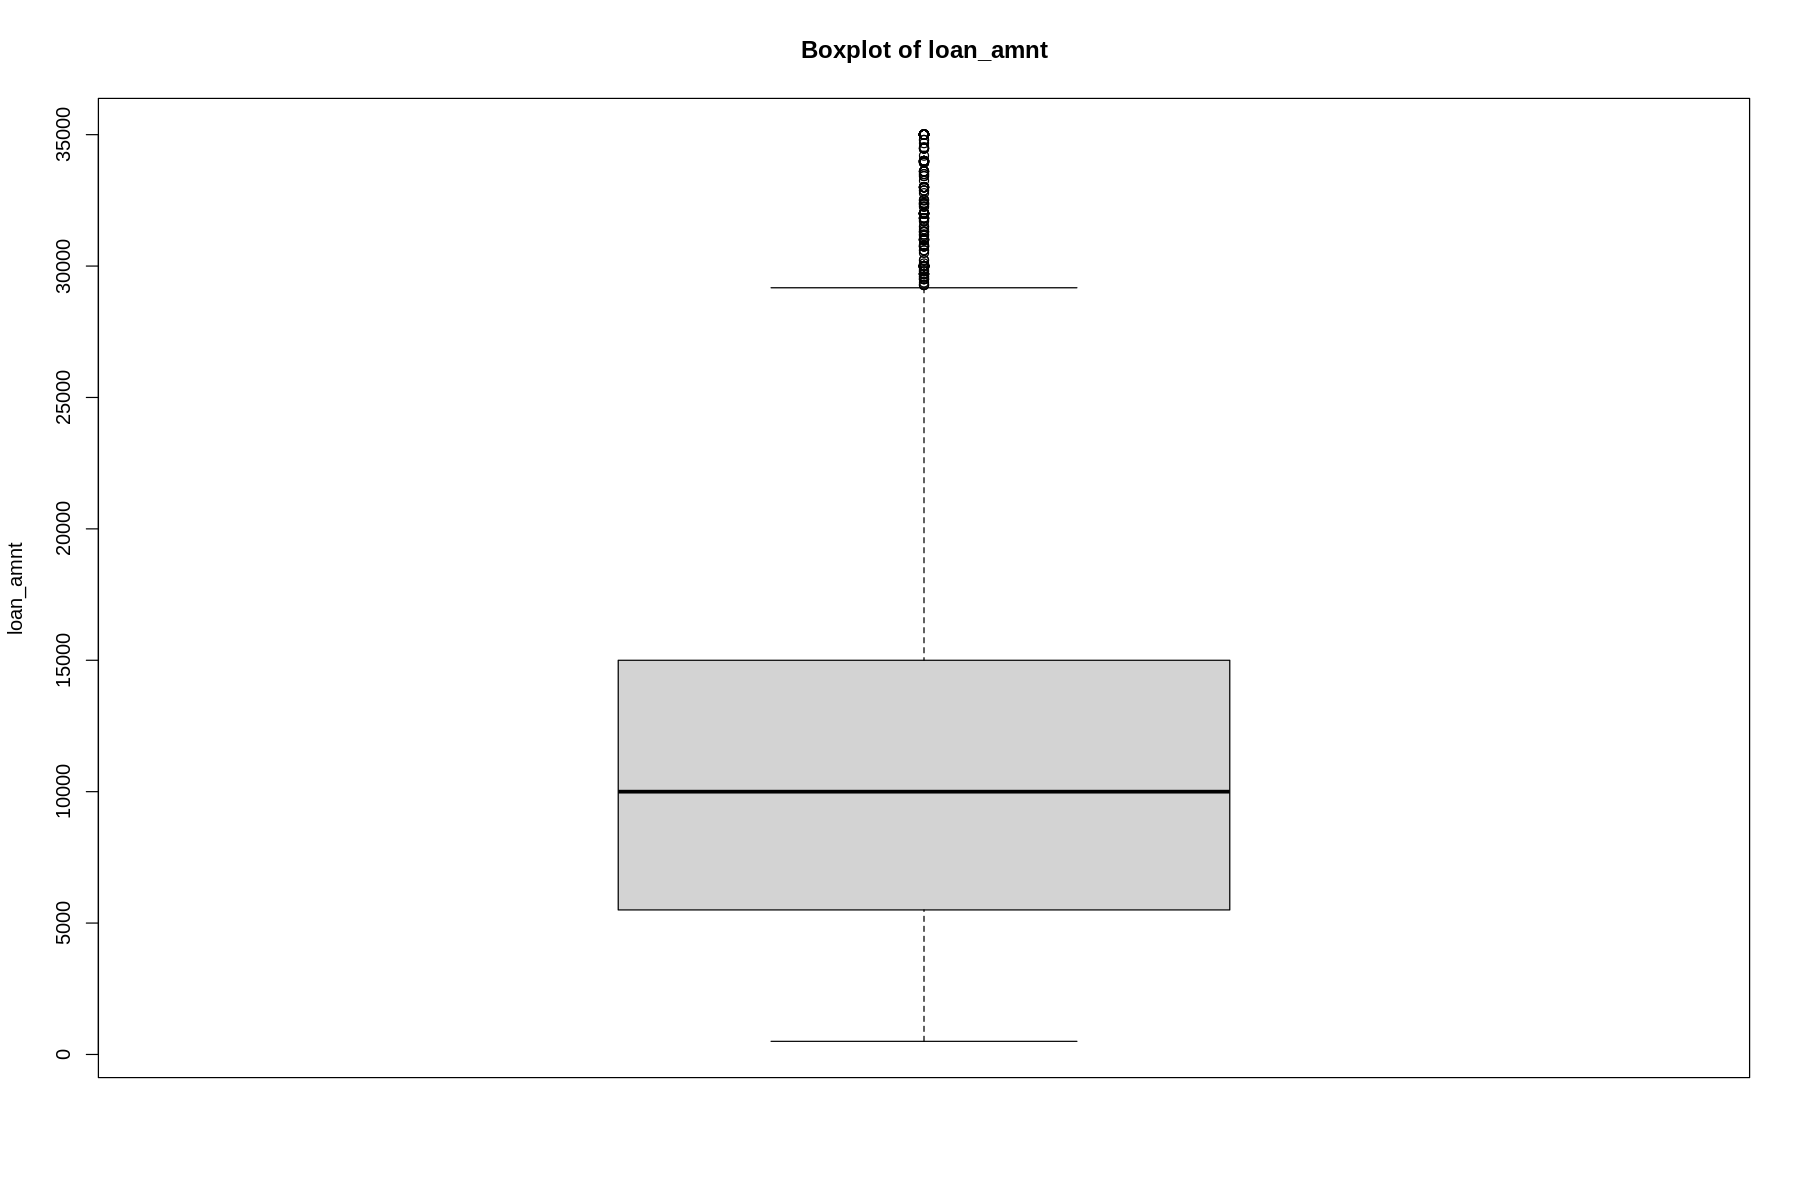

In [104]:
# making Box Plot:
boxplot(df$loan_amnt,
        ylab  ="loan_amnt",
        main = "Boxplot of loan_amnt")

In [105]:
#  now lower_bound: which means: "0.025" (2.5%)
lower_bound <- quantile(df$loan_amnt, 0.025)
lower_bound

2.5% 
1732.5

In [106]:
# upper_bound: which means: "0.98"(98%)
upper_bound <- quantile(df$loan_amnt, 0.98)
upper_bound

98% 
31516

In [107]:
lower_bound <- quantile(df$loan_amnt, 0.01)
upper_bound <- quantile(df$loan_amnt, 1.0)

outlier_ind <- which(df$loan_amnt < lower_bound | df$loan_amnt > upper_bound )

df[outlier_ind, ]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15,1000,36,16.29,35.31,NA,RENT,28000.0,Not Verified,Fully Paid,debt_consolidation,⋯,20.31,0,Sep-2007,1,11,0,6524,81.5,23,Dec-2016
414,1000,36,14.65,34.50,0,RENT,18408.0,Not Verified,Charged Off,major_purchase,⋯,6.00,0,Apr-1993,2,3,1,2510,83.7,8,Jun-2012
787,1000,36,13.49,33.94,8,RENT,35100.0,Not Verified,Fully Paid,small_business,⋯,6.19,0,Oct-1997,1,8,0,9219,73.1,17,Apr-2015
1373,1000,36,13.49,33.94,2,RENT,76000.0,Not Verified,Fully Paid,major_purchase,⋯,18.52,0,Sep-2005,0,9,0,3808,97.6,16,Dec-2014
1439,1000,36,15.27,34.80,3,OWN,27600.0,Not Verified,Fully Paid,other,⋯,21.91,0,Aug-2000,1,3,0,758,58.3,4,Dec-2016
1657,1000,36,10.65,32.58,NA,RENT,12000.0,Source Verified,Fully Paid,moving,⋯,4.00,0,Apr-1985,1,3,0,849,28.3,7,Mar-2016
1814,1000,36,19.03,36.68,2,RENT,38000.0,Not Verified,Charged Off,debt_consolidation,⋯,15.54,0,Jul-2001,2,8,0,10118,99.2,19,Oct-2016
1863,1000,36,16.29,35.31,NA,RENT,14400.0,Not Verified,Charged Off,debt_consolidation,⋯,15.00,0,Jan-2007,3,7,0,729,72.9,12,Oct-2016
1907,1000,36,16.29,35.31,NA,OWN,17280.0,Source Verified,Charged Off,debt_consolidation,⋯,22.08,0,Jun-2008,0,7,0,4431,70.3,10,Oct-2016


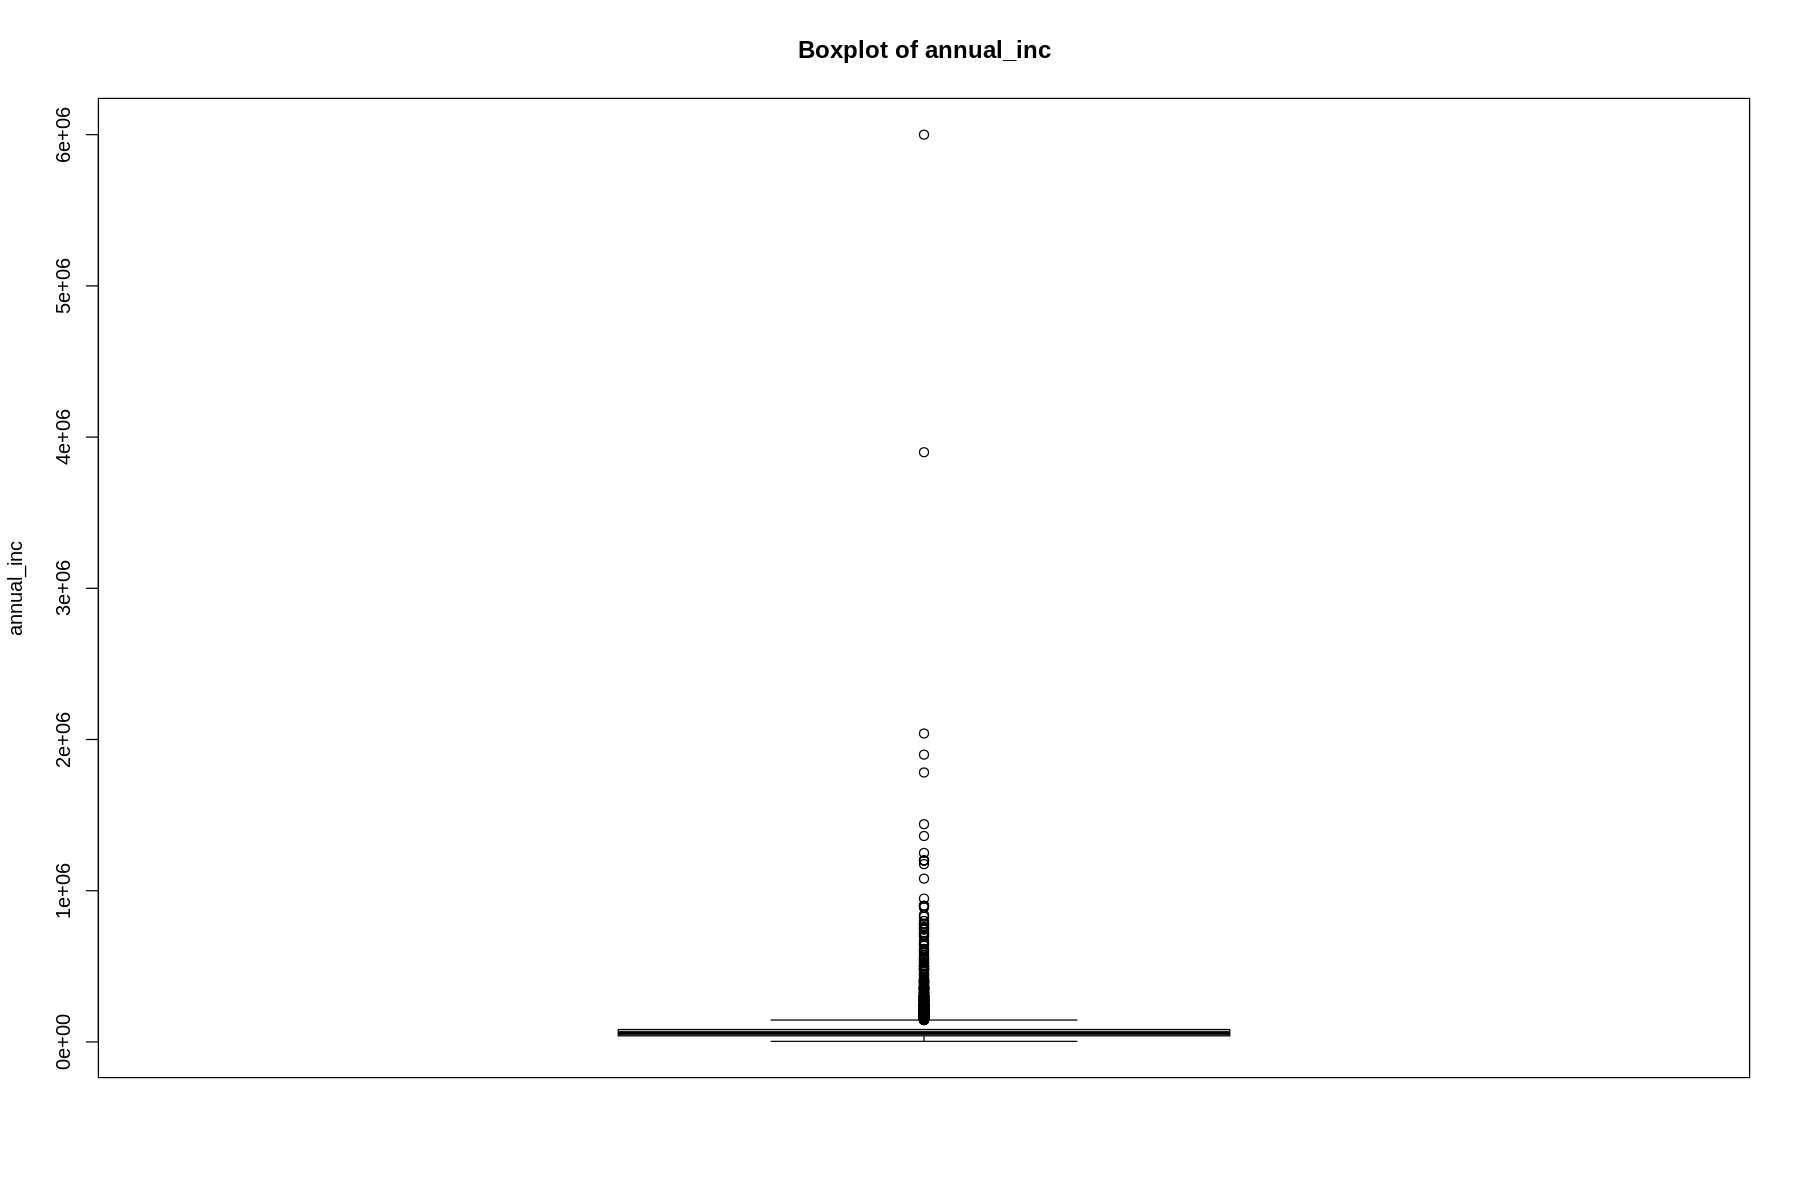

In [108]:
out <- boxplot.stats(df$annual_inc)$out
out_ind <- which (df$annual_inc %in% c(out))
boxplot(df$annual_inc,
        ylab = "annual_inc",
        main = "Boxplot of annual_inc")

In [109]:
 lower_bound <- quantile(df$annual_inc,0.025)
 lower_bound

2.5% 
19200

In [110]:
upper_bound <- quantile(df$annual_inc, 0.90)
upper_bound

90% 
116000

In [111]:
quantile(df$annual_inc, 0.50)

50% 
59000

In [112]:
lower_bound <- quantile(df$annual_inc, 0.0)
upper_bound <- quantile(df$annual_inc, 0.98)

outlier_ind <- which(df$annual_inc < lower_bound | df$annual_inc > upper_bound)

df[outlier_ind, ]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
165,25000,36,12.42,835.39,2,RENT,225000,Verified,Fully Paid,debt_consolidation,⋯,8.32,1,Jul-2004,0,11,0,30449,34.6,23,Nov-2016
330,35000,60,17.27,578.71,8,MORTGAGE,208000,Source Verified,Fully Paid,debt_consolidation,⋯,7.94,0,Feb-1993,0,11,0,3761,23.5,79,Dec-2016
384,5000,36,6.62,153.52,NA,RENT,276000,Source Verified,Fully Paid,debt_consolidation,⋯,1.82,0,Jun-2004,0,7,0,15175,56.0,18,Dec-2014
423,35000,60,19.42,916.03,8,RENT,195000,Verified,Fully Paid,debt_consolidation,⋯,11.72,0,Jan-1996,2,17,0,29573,66.1,27,Jun-2016
558,2000,36,9.91,64.45,NA,MORTGAGE,231252,Source Verified,Fully Paid,other,⋯,11.43,0,Mar-1980,0,19,0,46267,93.5,43,Dec-2016
705,28000,36,15.96,983.85,5,MORTGAGE,235000,Source Verified,Fully Paid,credit_card,⋯,9.08,0,Jul-1994,1,10,0,18287,82.7,27,Mar-2014
824,35000,60,19.03,593.77,4,MORTGAGE,235000,Verified,Charged Off,credit_card,⋯,14.08,0,Jul-1992,0,13,0,42936,83.8,31,Dec-2016
1053,12000,36,12.69,402.54,10,RENT,200000,Source Verified,Fully Paid,debt_consolidation,⋯,6.61,0,Jun-1995,2,7,0,16375,71.5,21,Oct-2013
1193,12000,36,6.03,365.23,6,MORTGAGE,243600,Verified,Fully Paid,medical,⋯,6.45,0,Mar-1996,0,8,0,38357,19.7,18,Dec-2014


HAMPEL FILLTER | 3 std dev. Away Method

Hampel fillter or 3 std sev. consider as outliers the values outside the interval(|). formed by the median, plus or minus 3 median absoulte dev.(M A D):

---
I = [ m e d i a n − 3 ⋅ M A D ; m e d i a n + 3 ⋅ M A D ]

---
M A D = m e d i a n ( | X i − ~ X | )


In [115]:
lower_bound <- median(df$annual_inc) - 3 * mad(df$annual_inc, constant = 1)
lower_bound

[1] -1000

In [117]:
upper_bound <- median(df$annual_inc) + 3 * mad(df$annual_inc, constant = 1)
upper_bound

[1] 119000

In [118]:
outlier_ind <- which(df$annual_inc < lower_bound | df$annual_inc > upper_bound)
outlier_ind

[1]    72    78    89    98   107   112   123   165   169   179   180   188
  [13]   218   223   235   292   325   327   330   384   409   420   423   426
  [25]   430   448   455   485   533   558   569   573   577   587   594   617
  [37]   636   680   696   705   718   745   748   768   786   797   824   832
  [49]   860   872   881   898   926   944   960   966   973  1013  1053  1088
  [61]  1116  1134  1142  1148  1160  1164  1184  1193  1200  1203  1227  1251
  [73]  1277  1287  1330  1331  1349  1353  1354  1365  1413  1416  1445  1446
  [85]  1456  1474  1507  1512  1529  1552  1563  1580  1592  1595  1600  1603
  [97]  1631  1653  1662  1667  1674  1681  1696  1704  1722  1726  1730  1743
 [109]  1756  1771  1780  1782  1788  1791  1802  1819  1821  1826  1866  1867
 [121]  1882  1889  1892  1897  1905  1932  1962  1966  1974  1983  1990  2040
 [133]  2075  2105  2109  2113  2117  2120  2129  2133  2145  2232  2239  2250
 [145]  2281  2284  2293  2294  2311  2322  2323  2342  2343  2344  2363  2385
 [157]  2410  2411  2417  2465  2521  2529  2546  2549  2576  2597  2606  2621
 [169]  2623  2630  2638  2641  2659  2673  2707  2708  2709  2714  2715  2716
 [181]  2740  2745  2752  2758  2764  2775  2800  2813  2875  2899  2923  2925
 [193]  2926  2928  2936  2938  2948  2954  2959  2965  2976  2978  2986  2996
 [205]  3017  3023  3042  3054  3055  3071  3081  3085  3108  3122  3125  3126
 [217]  3130  3138  3139  3142  3149  3151  3153  3161  3174  3192  3201  3205
 [229]  3210  3224  3232  3241  3244  3247  3253  3265  3272  3274  3277  3283
 [241]  3288  3325  3332  3337  3346  3353  3363  3377  3387  3389  3410  3415
 [253]  3416  3431  3432  3447  3451  3458  3459  3463  3470  3472  3475  3480
 [265]  3490  3499  3501  3514  3522  3523  3534  3545  3546  3558  3560  3584
 [277]  3594  3612  3626  3632  3641  3650  3658  3686  3695  3702  3703  3712
 [289]  3730  3733  3740  3750  3760  3766  3769  3773  3780  3800  3803  3808
 [301]  3813  3815  3821  3823  3829  3840  3845  3855  3875  3878  3882  3889
 [313]  3892  3895  3909  3912  3922  3926  3940  3947  3948  3951  3967  3971
 [325]  3972  3983  4004  4010  4020  4023  4034  4046  4076  4106  4110  4126
 [337]  4132  4144  4152  4153  4157  4161  4165  4168  4178  4207  4211  4214
 [349]  4232  4234  4255  4256  4280  4287  4301  4304  4319  4342  4343  4348
 [361]  4354  4381  4389  4395  4401  4402  4407  4419  4423  4435  4469  4472
 [373]  4476  4480  4496  4519  4526  4539  4544  4545  4552  4560  4563  4596
 [385]  4600  4620  4625  4629  4638  4639  4655  4660  4661  4668  4676  4687
 [397]  4688  4690  4692  4694  4707  4729  4738  4742  4749  4768  4784  4797
 [409]  4807  4808  4811  4816  4821  4829  4832  4848  4866  4877  4890  4898
 [421]  4902  4905  4912  4913  4919  4921  4935  4945  4964  4970  4985  4991
 [433]  4994  5007  5012  5015  5018  5024  5034  5042  5046  5048  5069  5072
 [445]  5083  5088  5103  5106  5107  5140  5142  5146  5148  5151  5160  5165
 [457]  5185  5194  5203  5211  5219  5233  5237  5248  5249  5266  5271  5285
 [469]  5296  5301  5338  5357  5358  5360  5362  5364  5367  5368  5370  5374
 [481]  5378  5385  5386  5392  5394  5415  5426  5462  5472  5473  5484  5486
 [493]  5490  5500  5503  5544  5561  5566  5568  5570  5583  5584  5589  5608
 [505]  5621  5622  5625  5642  5650  5652  5654  5661  5666  5677  5691  5693
 [517]  5701  5709  5723  5725  5729  5735  5740  5741  5757  5759  5761  5764
 [529]  5768  5773  5781  5791  5792  5802  5825  5844  5857  5867  5872  5874
 [541]  5875  5880  5881  5883  5884  5887  5891  5900  5919  5922  5931  5973
 [553]  5983  5997  5998  6006  6013  6021  6039  6053  6054  6065  6073  6086
 [565]  6087  6088  6089  6096  6097  6099  6101  6110  6117  6120  6149  6157
 [577]  6162  6170  6175  6184  6185  6206  6217  6224  6225  6237  6245  6248
 [589]  6262  6265  6268  6275  6276  6292  6299  6320  6321  6330  6334  6351
 [601]  6371  6408  6417  6427  6436  6438  6440  644

Scaling Data

In [119]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [120]:
library(caret)

In [121]:
head(df,10)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5000,36,10.65,162.87,10,RENT,24000,Verified,Fully Paid,credit_card,⋯,27.65,0,Jan-1985,1,3,0,13648,83.7,9,Dec-2016
2,2500,60,15.27,59.83,NA,RENT,30000,Source Verified,Charged Off,car,⋯,1.00,0,Apr-1999,5,3,0,1687,9.4,4,Oct-2016
3,2400,36,15.96,84.33,10,RENT,12252,Not Verified,Fully Paid,small_business,⋯,8.72,0,Nov-2001,2,2,0,2956,98.5,10,Dec-2016
4,10000,36,13.49,339.31,10,RENT,49200,Source Verified,Fully Paid,other,⋯,20.00,0,Feb-1996,1,10,0,5598,21.0,37,Apr-2016
5,5000,36,7.90,156.46,3,RENT,36000,Source Verified,Fully Paid,wedding,⋯,11.20,0,Nov-2004,3,9,0,7963,28.3,12,Jan-2016
6,7000,60,15.96,170.08,8,RENT,47004,Not Verified,Fully Paid,debt_consolidation,⋯,23.51,0,Jul-2005,1,7,0,17726,85.6,11,Sep-2016
7,3000,36,18.64,109.43,9,RENT,48000,Source Verified,Fully Paid,car,⋯,5.35,0,Jan-2007,2,4,0,8221,87.5,4,Dec-2014
8,5600,60,21.28,152.39,4,OWN,40000,Source Verified,Charged Off,small_business,⋯,5.55,0,Apr-2004,2,11,0,5210,32.6,13,Oct-2016
9,5375,60,12.69,121.45,NA,RENT,15000,Verified,Charged Off,other,⋯,18.08,0,Sep-2004,0,2,0,9279,36.5,3,Dec-2016


Normalization:
Min-Max Normalization:


1.   rescale values between 0 and 1.
2.   daat end uup with smaller stand dev, which can suppress the effect of outliers.



In [122]:
# will use "range" func. to implement min-max scaling 
# and send it to "predict()" func to get normalized data using min-max scaling method

In [124]:
process <- preProcess(as.data.frame(df), method = c("range"))
norm_scale <- predict(process, as.data.frame(df))



In [125]:
norm_scale

loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.13043478,0,0.27282212,0.11413726,1.0,RENT,0.003335557,Verified,Fully Paid,credit_card,⋯,0.92197399,0.00000000,Jan-1985,0.125,0.02380952,0,0.09123727,0.83783784,0.07954545,Dec-2016
0.05797101,1,0.51382368,0.03423032,NA,RENT,0.004336224,Source Verified,Charged Off,car,⋯,0.03334445,0.00000000,Apr-1999,0.625,0.02380952,0,0.01127764,0.09409409,0.02272727,Oct-2016
0.05507246,0,0.54981742,0.05322993,1.0,RENT,0.001376251,Not Verified,Fully Paid,small_business,⋯,0.29076359,0.00000000,Nov-2001,0.250,0.00000000,0,0.01976094,0.98598599,0.09090909,Dec-2016
0.27536232,0,0.42097027,0.25096549,1.0,RENT,0.007538359,Source Verified,Fully Paid,other,⋯,0.66688896,0.00000000,Feb-1996,0.125,0.19047619,0,0.03742279,0.21021021,0.39772727,Apr-2016
0.13043478,0,0.12936881,0.10916634,0.3,RENT,0.005336891,Source Verified,Fully Paid,wedding,⋯,0.37345782,0.00000000,Nov-2004,0.375,0.16666667,0,0.05323288,0.28328328,0.11363636,Jan-2016
0.18840580,1,0.54981742,0.11972858,0.8,RENT,0.007172115,Not Verified,Fully Paid,debt_consolidation,⋯,0.78392798,0.00000000,Jul-2005,0.125,0.11904762,0,0.11849881,0.85685686,0.10227273,Sep-2016
0.07246377,0,0.68961920,0.07269484,0.9,RENT,0.007338225,Source Verified,Fully Paid,car,⋯,0.17839280,0.00000000,Jan-2007,0.250,0.04761905,0,0.05495762,0.87587588,0.02272727,Dec-2014
0.14782609,1,0.82733438,0.10601008,0.4,OWN,0.006004003,Source Verified,Charged Off,small_business,⋯,0.18506169,0.00000000,Apr-2004,0.250,0.21428571,0,0.03482900,0.32632633,0.12500000,Oct-2016
0.14130435,1,0.37923839,0.08201629,NA,RENT,0.001834556,Verified,Charged Off,other,⋯,0.60286762,0.00000000,Sep-2004,0.000,0.00000000,0,0.06203038,0.36536537,0.01136364,Dec-2016


***Standardization:***


> all the features have a mean around zero and have roughly unit variance (mean = 0 and standard deviation = 1).

> outliers get weighted more than other values.





In [126]:
process <- preProcess(as.data.frame(df), method=c("center","scale"))
standard_scale <- predict(process, as.data.frame(df))

In [127]:
standard_scale

loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,⋯,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.8344490,-0.6050247,-0.36860632,-0.77449004,1.27913204,RENT,-0.70516992,Verified,Fully Paid,credit_card,⋯,2.14639617,-0.2978783,Jan-1985,0.1223897,-1.43016547,-0.2321003,0.01631587,1.2304030,-1.147819420,Dec-2016
-1.1695285,1.6527836,0.87174414,-1.26776633,NA,RENT,-0.61110725,Source Verified,Charged Off,car,⋯,-1.84419631,-0.2978783,Apr-1999,3.8600943,-1.43016547,-0.2321003,-0.73596335,-1.3916949,-1.586391553,Oct-2016
-1.1829316,-0.6050247,1.05699129,-1.15047917,1.27913204,RENT,-0.88934463,Not Verified,Fully Paid,small_business,⋯,-0.68819728,-0.2978783,Nov-2001,1.0568158,-1.65743462,-0.2321003,-0.65615043,1.7527051,-1.060104993,Dec-2016
-0.1642902,-0.6050247,0.39386020,0.07016903,1.27913204,RENT,-0.31010671,Source Verified,Fully Paid,other,⋯,1.00087901,-0.2978783,Feb-1996,0.1223897,0.16071858,-0.2321003,-0.48998358,-0.9823230,1.308184528,Apr-2016
-0.8344490,-0.6050247,-1.10691017,-0.80517619,-0.91802794,RENT,-0.51704458,Source Verified,Fully Paid,wedding,⋯,-0.31684009,-0.2978783,Nov-2004,1.9912420,-0.06655057,-0.2321003,-0.34123846,-0.7247010,-0.884676140,Jan-2016
-0.5663855,1.6527836,1.05699129,-0.73997410,0.65137205,RENT,-0.34453365,Not Verified,Fully Paid,debt_consolidation,⋯,1.52646924,-0.2978783,Jul-2005,0.1223897,-0.52108887,-0.2321003,0.27279900,1.2974553,-0.972390566,Sep-2016
-1.1025126,-0.6050247,1.77650194,-1.03031967,0.96525204,RENT,-0.32891925,Source Verified,Fully Paid,car,⋯,-1.19282380,-0.2978783,Jan-2007,1.0568158,-1.20289632,-0.2321003,-0.32501172,1.3645076,-1.586391553,Dec-2014
-0.7540300,1.6527836,2.48527364,-0.82466022,-0.60414794,OWN,-0.45433614,Source Verified,Charged Off,small_business,⋯,-1.16287564,-0.2978783,Apr-2004,1.0568158,0.38798773,-0.2321003,-0.51438658,-0.5729510,-0.796961713,Oct-2016
-0.7841871,1.6527836,0.17908089,-0.97277715,NA,RENT,-0.84626393,Verified,Charged Off,other,⋯,0.71337666,-0.2978783,Sep-2004,-0.8120365,-1.65743462,-0.2321003,-0.25846951,-0.4353174,-1.674105980,Dec-2016


**Feature Emgineering|Extraction**